## Show Matrix

Ryan Peruski, 07/21/23 - Shows confusion matrix based on run.py's results file

In [37]:
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_json('/root/BlurImageTrainingProject/weather_CLIP/results.json')
classes = ['clear', 'cloudy', 'fog', 'night', 'partly_cloudy', 'rain', 'snow']

In [39]:
y = df['y_true']
y = y.astype(np.uint8)
n_classes = len(set(y))

Y = label_binarize(y, classes=[*range(n_classes)])

preds = np.array([])
for i in range(n_classes):
    preds = np.append(preds, df['y_pred'] == i)
preds = preds.reshape(n_classes, -1).T
Y.shape, preds.shape

((990, 7), (990, 7))

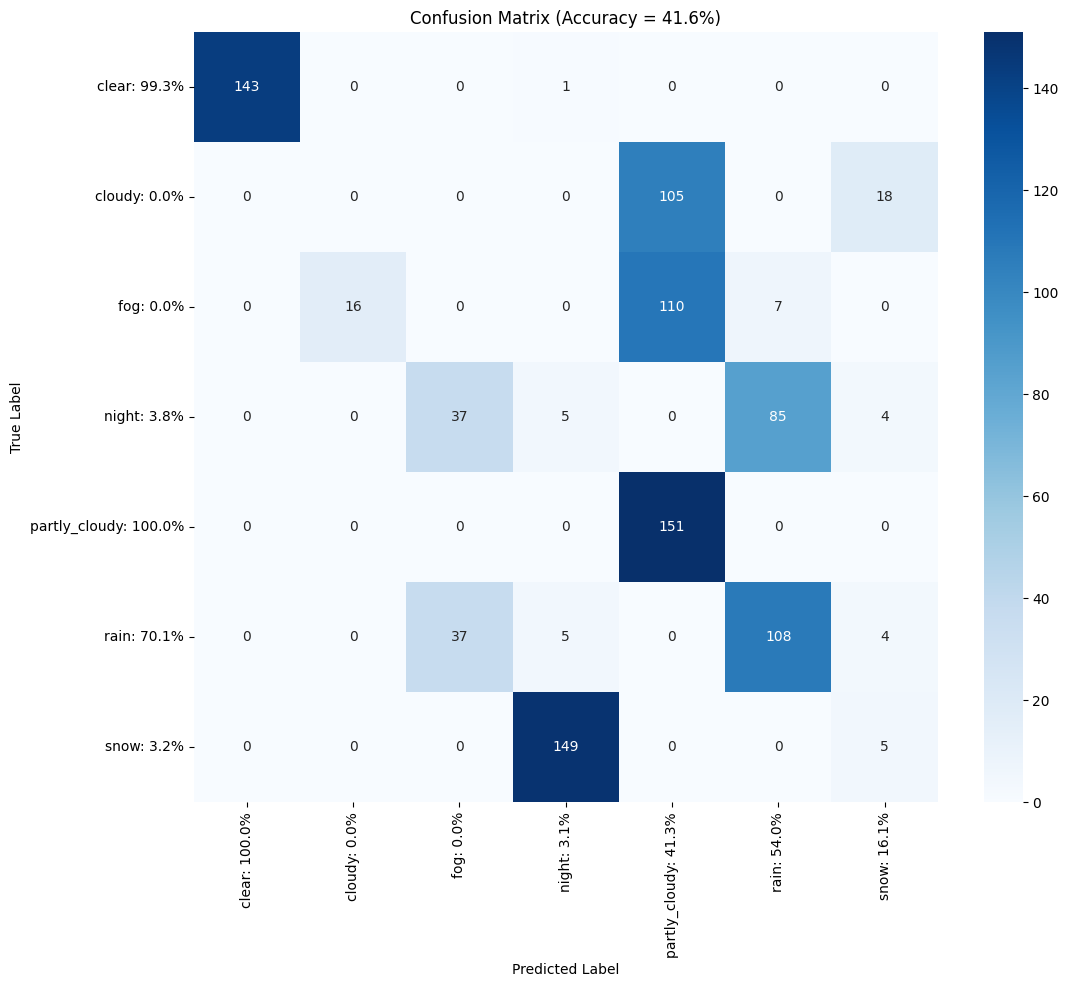

In [40]:
confusion_matrix_data = np.zeros((n_classes, n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        confusion_matrix_data[i, j] = np.sum(np.logical_and(preds[:, i], Y[:, j]))
# Normalize the confusion matrix to percentages
# (optional, you can remove this step if not needed)
confusion_matrix_data = confusion_matrix_data.T

#Get accuracy score
accuracy = np.trace(confusion_matrix_data) / float(np.sum(confusion_matrix_data))

#Grab accuracy scores for each class
accuracies = np.zeros(n_classes)
for i in range(n_classes):
    accuracies[i] = confusion_matrix_data[i, i] / float(np.sum(confusion_matrix_data[i, :]))

precisions = np.zeros(n_classes)
for i in range(n_classes):
    precisions[i] = confusion_matrix_data[i, i] / float(np.sum(confusion_matrix_data[:, i]))

# Define the class labels (optional, you can adjust these according to your problem)
class_labels = [f"{classes[i]}" for i in range(n_classes)]
class_labels_with_accuracy = [f"{classes[i]}: {100*accuracies[i]:.1f}%" for i in range(n_classes)]
class_labels_with_precision = [f"{classes[i]}: {100*precisions[i]:.1f}%" for i in range(n_classes)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(confusion_matrix_data, annot=True, cmap='Blues', fmt='.0f', xticklabels=class_labels_with_precision, yticklabels=class_labels_with_accuracy, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title(f'Confusion Matrix (Accuracy = {100*accuracy:.1f}%)')

# Show the plot
plt.savefig('5.png')
plt.show()

In [ ]:
for i, class_label in enumerate(class_labels):
    print(f"Class {class_label}: Recall = {100*accuracies[i]:.1f}%")